In [33]:
import psycopg2
import csv
import pandas as pd
import numpy as np
from datetime import datetime,date
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


In [34]:
db_connection = psycopg2.connect(host='129.105.248.26',dbname="walmart", user="yzq1348" , password="northwestern password")


cursor = db_connection.cursor()

In [35]:
cursor.execute("SELECT Store, Dept, Weekly_Sales, IsHoliday from weekly_sales ORDER BY Date DESC LIMIT 100")
rows=cursor.fetchall()

In [36]:
total_weekly_100 = pd.DataFrame(rows, columns=['Store','Dept','Weekly_Sales','IsHoliday'])
total_weekly_100

,Store,Dept,Weekly_Sales,IsHoliday
0,24,7,21461.95,False
1,24,29,4984.47,False
2,23,85,3935.06,False
3,24,6,3061.18,False
4,24,20,3892.23,False
...,...,...,...,...
95,23,52,2859.55,False
96,24,9,22928.77,False
97,23,7,33096.71,False
98,23,1,57391.58,False


In [37]:
import time

In [38]:
start = time.time()
cursor.execute("SELECT Store, Dept, Weekly_Sales, IsHoliday from weekly_sales ORDER BY Date DESC LIMIT 100")
end = time.time()
elapsed_time = end - start
print('Execution time:', elapsed_time, 'seconds')

Execution time: 0.6518526077270508 seconds


In [39]:
st= time.process_time()
cursor.execute("SELECT Store, Dept, Weekly_Sales, IsHoliday from weekly_sales ORDER BY Date DESC LIMIT 100")
et = time.process_time()
res = et - st
print('CPU Execution time:', res, 'seconds')

CPU Execution time: 0.00268000000000157 seconds


In [40]:
start2 = time.time()
cursor.execute("SELECT Store, Dept, Weekly_Sales, IsHoliday from weekly_sales ORDER BY Date DESC LIMIT 500")
end2 = time.time()
elapsed_time2 = end2 - start2
print('Execution time:', elapsed_time2, 'seconds')

Execution time: 0.7269477844238281 seconds


In [41]:
st2 = time.process_time()
cursor.execute("SELECT Store, Dept, Weekly_Sales, IsHoliday from weekly_sales ORDER BY Date DESC LIMIT 500")
et2 = time.process_time()
res2 = et2 - st2
print('CPU Execution time:', res2, 'seconds')

CPU Execution time: 0.0029450000000004195 seconds


In [42]:
import datetime
import edgedb

In [43]:
start3 = time.time()
st3 = time.process_time()
def main():
    client = edgedb.create_client()
    user_set = client.query(
        "SELECT * from weekly_sales ORDER BY Date DESC LIMIT 500")
    client.close()
end3 = time.time()
elapsed_time3 = end3 - start3
et3 = time.process_time()
res3 = et3 - st3
print('Execution time:', elapsed_time3, 'seconds')
print('CPU Execution time:', res3, 'seconds')

Execution time: 0.00014495849609375 seconds
CPU Execution time: 0.00016300000000057935 seconds


In [44]:
cursor.execute("SELECT Store, Dept, Weekly_Sales, IsHoliday from weekly_sales ORDER BY Date DESC")
rows=cursor.fetchall()

In [45]:
weekly_sales = pd.DataFrame(rows, columns=['Store','Dept','Weekly_Sales','IsHoliday'])
weekly_sales

,Store,Dept,Weekly_Sales,IsHoliday
0,35,6,2002.85,False
1,33,79,12536.24,False
2,31,30,2621.70,False
3,36,92,29277.00,False
4,35,4,19932.02,False
...,...,...,...,...
2950985,36,3,12.86,False
2950986,42,60,431.20,False
2950987,39,32,4127.35,False
2950988,43,92,88056.65,False


In [46]:
n100 = 100
weekly_sales_bootstrap_100 = weekly_sales.iloc[np.random.randint(n100, size=n100)]

In [47]:
#100

dataset_sizes = [100]  # Example list of dataset sizes

num_iterations = 50  # Number of simulation iterations

for size in dataset_sizes:
    results = []
    for _ in range(num_iterations):
        # Generate or load dataset of the specified size
        dataset = [weekly_sales_bootstrap_100 for _ in range(size)]
        
        # Perform simulation or calculations on the dataset
        # (replace this with your specific task)
        result = sum(dataset) / len(dataset)  # Example calculation
        
        results.append(result)
        
        Small_results = result

    # Analyze the results for the current dataset size
    avg_result = sum(results) / len(results)
    print(f"Average result for dataset size {size}: {avg_result}")

Average result for dataset size 100:     Store  Dept  Weekly_Sales  IsHoliday
57   31.0  60.0        369.00        0.0
68   39.0  30.0       4272.62        0.0
50   39.0  28.0       1372.38        0.0
30   35.0   1.0      25693.46        0.0
11   39.0  23.0      20056.26        0.0
..    ...   ...           ...        ...
60   32.0  38.0      66073.32        0.0
43   33.0  60.0         45.00        0.0
40   31.0  33.0       4996.80        0.0
20   29.0  30.0       2593.19        0.0
49   29.0  41.0        254.00        0.0

[100 rows x 4 columns]


In [48]:
Small_results["Weekly_Sales"].mean()

11534.6409

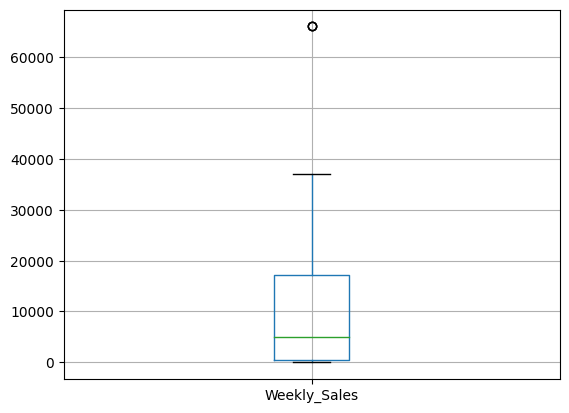

In [49]:
boxplot = Small_results.boxplot(column=['Weekly_Sales']) 

In [50]:
n500 = 500
weekly_sales_bootstrap_500 = weekly_sales.iloc[np.random.randint(n500, size=n500)]

In [51]:
#500

dataset_sizes = [500]  # Example list of dataset sizes

num_iterations = 50  # Number of simulation iterations

for size in dataset_sizes:
    results = []
    for _ in range(num_iterations):
        # Generate or load dataset of the specified size
        dataset = [weekly_sales_bootstrap_500 for _ in range(size)]
        
        # Perform simulation or calculations on the dataset
        # (replace this with your specific task)
        result = sum(dataset) / len(dataset)  # Example calculation
        
        results.append(result)
        
        Large_results = result

    # Analyze the results for the current dataset size
    avg_result = sum(results) / len(results)
    print(f"Average result for dataset size {size}: {avg_result}")

Average result for dataset size 500:      Store  Dept  Weekly_Sales  IsHoliday
455   43.0   5.0        700.52        0.0
182   38.0  38.0      66530.78        0.0
51    29.0  93.0       1350.64        0.0
47    30.0  31.0         26.50        0.0
322    1.0  18.0      17934.28        0.0
..     ...   ...           ...        ...
110   34.0  38.0      40344.49        0.0
266    8.0  34.0       7032.21        0.0
436    3.0  20.0       1601.47        0.0
165   30.0  93.0      23674.79        0.0
458   44.0  28.0         64.41        0.0

[500 rows x 4 columns]


In [52]:
Large_results["Weekly_Sales"].mean()

13605.456119999988

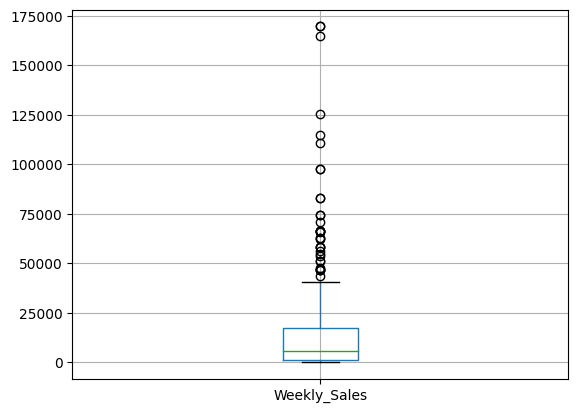

In [53]:
boxplot = Large_results.boxplot(column=['Weekly_Sales']) 